In [1]:
import mlflow
import mlflow.sklearn
import pandas as pd
import os, sys, joblib


In [2]:
sys.path.append(os.path.abspath('..'))

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from src.model_training import SplitData, TrainData, EvaluateModel
from src.encoding import DataProcessing

In [5]:
df = pd.read_csv('../data/cleaned_data.csv')

In [8]:
df.dtypes

user_id                    int64
transaction_frequency      int64
signup_time               object
purchase_time             object
velocity_check           float64
purchase_hour              int64
purchase_weekday           int64
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address                 int64
country                   object
class                      int64
dtype: object

In [9]:
df.head(3)

,user_id,transaction_frequency,signup_time,purchase_time,velocity_check,purchase_hour,purchase_weekday,purchase_value,device_id,source,browser,sex,age,ip_address,country,class
0,22058,1,2015-02-24 22:55:49,2015-04-18 02:47:11,4506682.0,2,5,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,Japan,0
1,333320,1,2015-06-07 20:39:50,2015-06-08 01:38:54,17944.0,1,0,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,United States,0
2,1359,1,2015-01-01 18:52:44,2015-01-01 18:52:45,1.0,18,3,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,United States,1


In [10]:
dp = DataProcessing(df)

In [11]:
encoded_data = dp.encode_data()
encoded_data

,user_id,transaction_frequency,signup_time,purchase_time,velocity_check,purchase_hour,purchase_weekday,purchase_value,device_id,source,browser,sex,age,ip_address,country,class
0,22058,1,36002,32172,4506682.0,2,5,34,76540,2,0,1,39,732758368,84,0
1,333320,1,91239,58983,17944.0,1,0,16,20613,0,0,0,53,350311387,171,0
2,1359,1,816,397,1.0,18,3,15,112601,2,3,1,53,2621473820,171,1
3,221365,1,114292,107724,4361461.0,18,2,39,58964,0,4,1,45,415583117,171,0
4,159135,1,81860,75699,4240931.0,8,3,42,2022,0,0,1,18,2809315199,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129141,360761,1,28169,56468,9769126.0,8,2,13,19052,2,4,0,42,874065719,171,0
129142,345170,1,20636,23500,5261233.0,0,6,43,107516,2,0,1,28,3451154526,171,1
129143,274471,1,78830,52344,931270.0,12,1,35,54051,2,4,1,32,2439047221,118,0
129144,368416,1,39784,49086,6681616.0,7,2,40,55081,2,2,0,26,2748470523,84,0


In [12]:
encoded_data = encoded_data.drop('class', axis=1)
encoded_data.head()

,user_id,transaction_frequency,signup_time,purchase_time,velocity_check,purchase_hour,purchase_weekday,purchase_value,device_id,source,browser,sex,age,ip_address,country
0,22058,1,36002,32172,4506682.0,2,5,34,76540,2,0,1,39,732758368,84
1,333320,1,91239,58983,17944.0,1,0,16,20613,0,0,0,53,350311387,171
2,1359,1,816,397,1.0,18,3,15,112601,2,3,1,53,2621473820,171
3,221365,1,114292,107724,4361461.0,18,2,39,58964,0,4,1,45,415583117,171
4,159135,1,81860,75699,4240931.0,8,3,42,2022,0,0,1,18,2809315199,32


In [20]:
standard_data = dp.standardize_data(encoded_data)
standard_data.head()

,user_id,transaction_frequency,signup_time,purchase_time,velocity_check,purchase_hour,purchase_weekday,purchase_value,device_id,source,browser,sex,age,ip_address,country
0,-1.543648,0.0,-0.766351,-0.867487,-0.134383,-1.375837,0.989675,-0.160088,0.507287,1.111897,-0.953526,0.843730,0.681533,-1.068959,-0.658607
1,1.154567,0.0,0.715279,-0.146300,-1.568661,-1.520551,-1.501506,-1.142743,-1.128924,-1.127381,-0.953526,-1.185213,2.306556,-1.421378,0.854608
2,-1.723080,0.0,-1.710150,-1.722200,-1.574394,0.939575,-0.006798,-1.197335,1.562294,1.111897,1.128955,0.843730,2.306556,0.671467,0.854608
3,0.184070,0.0,1.333633,1.164780,-0.180785,0.939575,-0.505034,0.112871,-0.006920,-1.127381,1.823115,0.843730,1.377971,-1.361231,0.854608
4,-0.355378,0.0,0.463705,0.303342,-0.219298,-0.507558,-0.006798,0.276647,-1.672826,-1.127381,-0.953526,0.843730,-1.756001,0.844561,-1.563058


In [21]:
index = df.columns.get_loc('country')
my_value = df['class']
standard_data.insert(index + 1, 'class', my_value)
standard_data.head()

,user_id,transaction_frequency,signup_time,purchase_time,velocity_check,purchase_hour,purchase_weekday,purchase_value,device_id,source,browser,sex,age,ip_address,country,class
0,-1.543648,0.0,-0.766351,-0.867487,-0.134383,-1.375837,0.989675,-0.160088,0.507287,1.111897,-0.953526,0.843730,0.681533,-1.068959,-0.658607,0
1,1.154567,0.0,0.715279,-0.146300,-1.568661,-1.520551,-1.501506,-1.142743,-1.128924,-1.127381,-0.953526,-1.185213,2.306556,-1.421378,0.854608,0
2,-1.723080,0.0,-1.710150,-1.722200,-1.574394,0.939575,-0.006798,-1.197335,1.562294,1.111897,1.128955,0.843730,2.306556,0.671467,0.854608,1
3,0.184070,0.0,1.333633,1.164780,-0.180785,0.939575,-0.505034,0.112871,-0.006920,-1.127381,1.823115,0.843730,1.377971,-1.361231,0.854608,0
4,-0.355378,0.0,0.463705,0.303342,-0.219298,-0.507558,-0.006798,0.276647,-1.672826,-1.127381,-0.953526,0.843730,-1.756001,0.844561,-1.563058,0


In [22]:
standard_data.to_csv('../data/standard_data.csv', index=False)

In [23]:
x = standard_data.drop('class', axis=1)
y = standard_data['class']

In [24]:
sd = SplitData( x, y )
x_train, x_test, y_train, y_test = sd.split_data() 

In [33]:
print(x_train.shape, x_test.shape)
print(x_train.columns, x_test.columns)


(103316, 15) (25830, 15)
Index(['user_id', 'transaction_frequency', 'signup_time', 'purchase_time',
       'velocity_check', 'purchase_hour', 'purchase_weekday', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address',
       'country'],
      dtype='object') Index(['user_id', 'transaction_frequency', 'signup_time', 'purchase_time',
       'velocity_check', 'purchase_hour', 'purchase_weekday', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address',
       'country'],
      dtype='object')


In [25]:
td = TrainData(x_train, y_train)


In [26]:
#mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("decision_tree_Classifier")
with mlflow.start_run():
    #model training
    decision_tree_model = td.decision_tree_Classifier()
    eval = EvaluateModel()
    accuracy, precision, recall, f1, roc_auc = [], [], [], [], []
    accuracy, precision, recall, f1, roc_auc, _ = eval.evaluate_model(decision_tree_model, x_test, y_test)

    #logging parameters, metrics, model
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.sklearn.log_model(decision_tree_model, "decision_tree_model")
joblib.dump(decision_tree_model, filename = '../models/DTM.pkl', compress = 3)



2025/02/16 20:37:58 INFO mlflow.tracking.fluent: Experiment with name 'decision_tree_Classifier' does not exist. Creating a new experiment.
2025/02/16 20:38:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


['../models/DTM.pkl']

In [27]:

mlflow.set_experiment("xg_model")
with mlflow.start_run():
    #model training
    xg_model = td.xgboost_classifier()
    eval = EvaluateModel()
    accuracy, precision, recall, f1, roc_auc = [], [], [], [], []
    accuracy, precision, recall, f1, roc_auc, _ = eval.evaluate_model(xg_model, x_test, y_test)

    #logging parameters, metrics, model
    mlflow.log_param("random_state", 42)
    mlflow.log_param("scale_pos_weight", 49)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.sklearn.log_model(xg_model, "xg_model")

joblib.dump(xg_model, filename = '../models/XGM.pkl', compress = 3)

2025/02/16 20:38:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


['../models/XGM.pkl']

In [28]:

mlflow.set_experiment("random_forest_model")
with mlflow.start_run():
    #model training
    random_forest_model = td.random_forest()
    eval = EvaluateModel()
    accuracy, precision, recall, f1, roc_auc = [], [], [], [], []
    accuracy, precision, recall, f1, roc_auc, _ = eval.evaluate_model(random_forest_model, x_test, y_test)

    #logging parameters, metrics, model
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("n_jobs", -1)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", roc_auc)
    mlflow.sklearn.log_model(random_forest_model, "random_forest_model")
joblib.dump(random_forest_model, filename = '../models/RF.pkl', compress = 3)


2025/02/16 20:39:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


['../models/RF.pkl']

In [31]:
eval = EvaluateModel()
accuracy_value, precision_value, recall_value, f1_value, roc_auc_value = [], [], [], [], []
models = ['Decision_tree', 'RandomForest', 'XGBOOST']

for model in [decision_tree_model, random_forest_model, xg_model]:
    accuracy, precision, recall, f1, roc_auc, _ = eval.evaluate_model(model, x_test, y_test)
    accuracy_value.append(accuracy)
    precision_value.append(precision)
    recall_value.append(recall) 
    f1_value.append(f1) 
    roc_auc_value.append(roc_auc) 


for i, model_name in enumerate(models):
    print(f'Evaluate result for {model_name}: ')
    print(f'      Accuracy: {accuracy_value[i]} ')
    print(f'      precision score: {precision_value[i]} ')
    print(f'      recall   {recall_value[i]}')
    print(f'      f1_score  {f1_value[i]}')
    print(f'      roc_auc score  {roc_auc_value[i]}')

Evaluate result for Decision_tree: 
      Accuracy: 0.9057297715834302 
      precision score: 0.5049822064056939 
      recall   0.5761266747868453
      f1_score  0.5382135406789303
      roc_auc score  0.7582991400210599
Evaluate result for RandomForest: 
      Accuracy: 0.9569879984514131 
      precision score: 1.0 
      recall   0.5489240763296792
      f1_score  0.7087811271297509
      roc_auc score  0.7744620381648396
Evaluate result for XGBOOST: 
      Accuracy: 0.40751064653503677 
      precision score: 0.12109766892888758 
      recall   0.833130328867235
      f1_score  0.21145919208573785
      roc_auc score  0.5978892539615843


100%|===================| 51627/51660 [00:29<00:00]        

<Figure size 640x480 with 0 Axes>

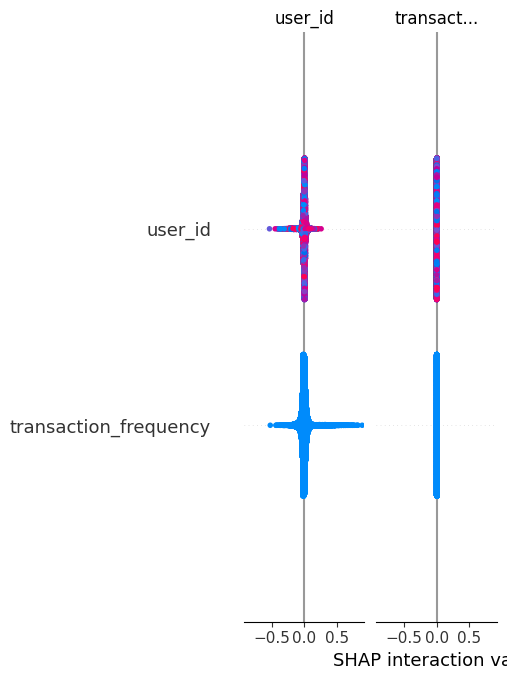

  2%|                   | 878/51660 [01:25<81:56]       

In [ ]:
from src.model_explainability import ModelExplainability
models = [decision_tree_model, random_forest_model, xg_model]
feature_names =['user_id','transaction_frequency', 'signup_time', 'purchase_time', 'velocity_check',  'purchase_hour','purchase_weekday','purchase_value','device_id','source', 'browser','sex','age','ip_address','country']
for model in models:
    explain_model = ModelExplainability(model, x_train, x_test, feature_names)
    explain_model.explain_with_shap()